In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [66]:
df1 = pd.read_csv('df_merged.csv')
df1

,month,CO2ppm,Temp,Humid,VPD,Chl_a,Chl_b,TChl,Car,Chl_a_b,...,DF_abs,SFI_abs,Fv-Fm,Leaf_ExtractionYield,Root_ExtractionYield,Leaf_TPC,Root_TPC,Leaf_TFC,Root_TFC,scenario
0,5,381.681033,16.918639,83.130786,1.532512,8.79,2.22,11.00,2.97,3.97,...,0.328,0.215,0.830,19.00,18.90,7.476,6.270,5.217,0.861,SSP1
1,5,374.463441,16.922124,83.096722,1.532868,8.99,2.56,11.55,3.09,3.52,...,0.287,0.199,0.826,20.10,19.60,7.369,6.396,5.257,0.836,SSP1
2,5,371.850683,16.930256,82.488003,1.534584,9.66,2.44,12.10,3.11,3.96,...,0.384,0.229,0.828,20.70,20.40,7.369,6.396,5.242,0.841,SSP1
3,5,400.475202,16.921511,82.081632,1.534512,9.33,2.45,11.79,3.13,3.80,...,0.503,0.282,0.839,19.00,18.90,7.476,6.270,5.217,0.861,SSP1
4,5,381.360788,16.921323,83.888666,1.531475,10.53,2.58,13.11,3.37,4.08,...,0.304,0.203,0.832,20.10,19.60,7.369,6.396,5.257,0.836,SSP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,1208.463000,25.901000,60.192000,2.560000,2.64,0.52,3.15,1.07,5.09,...,-0.626,0.051,0.722,7.10,14.60,7.743,5.277,1.455,0.513,SSP5
401,9,1211.911000,25.896000,60.254000,2.559000,4.74,1.12,5.86,1.53,4.22,...,-0.829,0.046,0.588,7.05,14.55,7.760,5.245,1.450,0.507,SSP5
402,9,1206.015000,25.923000,59.125000,2.565000,2.52,0.08,2.60,1.38,31.49,...,-0.879,0.037,0.643,7.00,14.50,7.814,5.324,1.460,0.518,SSP5
403,9,1225.166000,25.890000,55.446000,2.571000,2.63,0.39,3.02,1.17,6.73,...,-0.478,0.067,0.727,7.10,14.60,7.743,5.277,1.455,0.513,SSP5


In [67]:
# 데이터 기본 정보 확인
print("="*60)
print("데이터 기본 정보")
print("="*60)
print(f"데이터 크기: {df1.shape}")
print(f"변수 개수: {df1.shape[1]}")
print(f"데이터 개수: {df1.shape[0]}")
print("\n변수 목록:")
print(df1.columns.tolist())
print("\n데이터 타입:")
print(df1.dtypes)
print("\n결측치 확인:")
print(df1.isnull().sum())


데이터 기본 정보
데이터 크기: (405, 26)
변수 개수: 26
데이터 개수: 405

변수 목록:
['month', 'CO2ppm', 'Temp', 'Humid', 'VPD', 'Chl_a', 'Chl_b', 'TChl', 'Car', 'Chl_a_b', 'TCh-Car', 'ABS-RC', 'Dio-RC', 'Tro-RC', 'Eto-RC', 'PI_abs', 'DF_abs', 'SFI_abs', 'Fv-Fm', 'Leaf_ExtractionYield', 'Root_ExtractionYield', 'Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC', 'scenario']

데이터 타입:
month                     int64
CO2ppm                  float64
Temp                    float64
Humid                   float64
VPD                     float64
Chl_a                   float64
Chl_b                   float64
TChl                    float64
Car                     float64
Chl_a_b                 float64
TCh-Car                 float64
ABS-RC                  float64
Dio-RC                  float64
Tro-RC                  float64
Eto-RC                  float64
PI_abs                  float64
DF_abs                  float64
SFI_abs                 float64
Fv-Fm                   float64
Leaf_ExtractionYield    float64
Root_E

In [68]:
# 상관관계 분석
numeric_df = df1.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# 높은 상관관계를 가진 변수 쌍 찾기
print("="*60)
print("높은 상관관계를 가진 변수 쌍 (|r| > 0.8)")
print("="*60)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_matrix.iloc[i, j]
            ))

# 상관계수 크기 순으로 정렬
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr in high_corr_pairs:
    print(f"{var1:20} <-> {var2:20} : {corr:6.3f}")

print(f"\n총 {len(high_corr_pairs)}개의 높은 상관관계 쌍 발견")


높은 상관관계를 가진 변수 쌍 (|r| > 0.8)
Temp                 <-> VPD                  :  0.997
PI_abs               <-> SFI_abs              :  0.989
Chl_a                <-> TChl                 :  0.987
ABS-RC               <-> Tro-RC               :  0.966
Dio-RC               <-> DF_abs               : -0.965
Dio-RC               <-> Fv-Fm                : -0.962
DF_abs               <-> Fv-Fm                :  0.931
DF_abs               <-> SFI_abs              :  0.925
ABS-RC               <-> SFI_abs              : -0.925
ABS-RC               <-> Dio-RC               :  0.914
month                <-> Leaf_ExtractionYield : -0.912
TChl                 <-> Car                  :  0.908
ABS-RC               <-> DF_abs               : -0.898
Chl_a                <-> Car                  :  0.895
PI_abs               <-> DF_abs               :  0.890
Tro-RC               <-> SFI_abs              : -0.882
ABS-RC               <-> PI_abs               : -0.874
Dio-RC               <-> SFI_abs    

In [69]:
# VIF (Variance Inflation Factor) 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 숫자형 데이터만 선택 (month 제외)
vif_data = numeric_df.drop(['month'], axis=1, errors='ignore')

# VIF 계산
print("="*60)
print("VIF (Variance Inflation Factor) 분석")
print("="*60)
print("VIF > 10: 심각한 다중공산성")
print("VIF > 5: 다중공산성 의심")
print("-"*60)

vif_results = []
for i in range(len(vif_data.columns)):
    vif = variance_inflation_factor(vif_data.values, i)
    vif_results.append({
        'Variable': vif_data.columns[i],
        'VIF': vif
    })

vif_df = pd.DataFrame(vif_results)
vif_df = vif_df.sort_values('VIF', ascending=False)

# VIF 값 출력
for _, row in vif_df.iterrows():
    status = ""
    if row['VIF'] > 10:
        status = " ⚠️ 심각한 다중공산성"
    elif row['VIF'] > 5:
        status = " ⚠️ 다중공산성 의심"
    print(f"{row['Variable']:25} : VIF = {row['VIF']:10.2f}{status}")

print("\n" + "="*60)
print(f"VIF > 10인 변수: {len(vif_df[vif_df['VIF'] > 10])}개")
print(f"VIF > 5인 변수: {len(vif_df[vif_df['VIF'] > 5])}개")


VIF (Variance Inflation Factor) 분석
VIF > 10: 심각한 다중공산성
VIF > 5: 다중공산성 의심
------------------------------------------------------------
ABS-RC                    : VIF = 32235291.21 ⚠️ 심각한 다중공산성
Tro-RC                    : VIF = 19394305.14 ⚠️ 심각한 다중공산성
TChl                      : VIF = 3282460.19 ⚠️ 심각한 다중공산성
Chl_a                     : VIF = 2015120.26 ⚠️ 심각한 다중공산성
Dio-RC                    : VIF = 1769634.82 ⚠️ 심각한 다중공산성
Chl_b                     : VIF =  154745.56 ⚠️ 심각한 다중공산성
Temp                      : VIF =   51334.16 ⚠️ 심각한 다중공산성
VPD                       : VIF =   29948.12 ⚠️ 심각한 다중공산성
Fv-Fm                     : VIF =    9568.42 ⚠️ 심각한 다중공산성
SFI_abs                   : VIF =    2201.79 ⚠️ 심각한 다중공산성
Eto-RC                    : VIF =    1826.02 ⚠️ 심각한 다중공산성
Root_TPC                  : VIF =    1727.92 ⚠️ 심각한 다중공산성
Car                       : VIF =    1433.67 ⚠️ 심각한 다중공산성
TCh-Car                   : VIF =    1426.98 ⚠️ 심각한 다중공산성
DF_abs                    : VIF =     963.10 ⚠️ 심각한 

In [70]:
# 이상치 탐지 (IQR 방법)
def detect_outliers_iqr(df, column):
    """IQR 방법으로 이상치 탐지"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("="*60)
print("이상치 탐지 결과 (IQR 방법)")
print("="*60)

outlier_summary = []
for col in numeric_df.columns:
    if col == 'month':
        continue
    
    outliers, lower, upper = detect_outliers_iqr(numeric_df, col)
    outlier_count = len(outliers)
    
    if outlier_count > 0:
        outlier_percentage = (outlier_count / len(numeric_df)) * 100
        outlier_summary.append({
            'Variable': col,
            'Outlier_Count': outlier_count,
            'Percentage': outlier_percentage,
            'Lower_Bound': lower,
            'Upper_Bound': upper
        })
        print(f"{col:25} : {outlier_count:4}개 ({outlier_percentage:5.1f}%) | 정상범위: [{lower:8.2f}, {upper:8.2f}]")

print(f"\n이상치가 있는 변수: {len(outlier_summary)}개")


이상치 탐지 결과 (IQR 방법)
Temp                      :   15개 (  3.7%) | 정상범위: [   18.70,    31.04]


Humid                     :   45개 ( 11.1%) | 정상범위: [   55.59,    73.72]
VPD                       :   14개 (  3.5%) | 정상범위: [    1.62,     3.22]
Chl_a                     :    6개 (  1.5%) | 정상범위: [    0.93,     9.93]
Chl_b                     :   24개 (  5.9%) | 정상범위: [    0.40,     2.64]
TChl                      :    9개 (  2.2%) | 정상범위: [    1.33,    12.57]
Car                       :    3개 (  0.7%) | 정상범위: [    0.44,     3.56]
Chl_a_b                   :   18개 (  4.4%) | 정상범위: [    2.05,     5.52]
TCh-Car                   :   12개 (  3.0%) | 정상범위: [    2.12,     4.84]
Dio-RC                    :   38개 (  9.4%) | 정상범위: [   -0.01,     0.84]
Tro-RC                    :   13개 (  3.2%) | 정상범위: [    0.68,     2.66]
Eto-RC                    :   12개 (  3.0%) | 정상범위: [    0.25,     1.00]
PI_abs                    :   30개 (  7.4%) | 정상범위: [   -0.50,     3.38]
DF_abs                    :   56개 ( 13.8%) | 정상범위: [   -0.48,     0.74]
SFI_abs                   :   15개 (  3.7%) | 정상범위: [    0.01,   

## 📊 다중공산성 처리 방안

### 1. 다중공산성 문제 분석
- **VIF > 10**: 심각한 다중공산성 - 반드시 처리 필요
- **VIF > 5**: 다중공산성 의심 - 상황에 따라 처리 고려
- 높은 상관관계(|r| > 0.8)를 가진 변수 쌍 확인

### 2. 처리 방법 (우선순위 순)

#### 방법 1: 변수 선택 (Variable Selection)
- 상관관계가 높은 변수 중 하나를 제거
- 도메인 지식을 활용하여 더 중요한 변수를 선택
- 예: TChl(총엽록소)과 Chl_a, Chl_b가 높은 상관관계 → TChl만 사용

#### 방법 2: 주성분 분석 (PCA)
- 상관관계가 높은 변수들을 주성분으로 변환
- 정보 손실을 최소화하면서 차원 축소
- 해석이 어려워질 수 있음

#### 방법 3: 능선 회귀 (Ridge Regression)
- 다중공산성이 있어도 안정적인 추정 가능
- 회귀 계수에 패널티 부여

#### 방법 4: 변수 변환
- 비율 변수 생성 (예: Chl_a/Chl_b 비율)
- 차이 변수 생성 (예: TChl - Car)


## 🔍 이상치 처리 방안

### 1. 이상치 처리 여부 결정 기준

#### ✅ 이상치를 **제거하지 않는** 경우 (권장)
1. **천궁 재배 데이터의 특성상 극한 기후 조건이 중요**
   - 극한 온도, 습도 조건에서의 생육 반응이 연구 목적일 수 있음
   - 기후변화 시나리오 예측에는 극값이 중요한 정보

2. **이상치 비율이 낮은 경우 (< 5%)**
   - 대부분 변수의 이상치 비율이 5% 미만
   - 모델의 강건성(robustness)을 해치지 않음

3. **시계열 데이터의 특성**
   - 계절적 변동으로 인한 자연스러운 극값일 가능성
   - 여름/겨울철 극한 기온은 정상적인 현상

#### ⚠️ 이상치를 **처리해야 하는** 경우
1. **명백한 측정 오류**
   - 물리적으로 불가능한 값 (예: 습도 > 100%)
   - 음수여야 할 값이 양수인 경우

2. **이상치 비율이 매우 높은 경우 (> 15%)**
   - Fv-Fm (16.5%), DF_abs (13.8%) 등
   - 모델 학습에 부정적 영향 가능

### 2. 이상치 처리 방법

#### 방법 1: Winsorization (권장)
- 극단값을 특정 백분위수로 대체
- 정보 손실 최소화
```python
# 95% 백분위수로 캡핑
df[col] = df[col].clip(lower=df[col].quantile(0.025), 
                       upper=df[col].quantile(0.975))
```

#### 방법 2: 로그 변환
- 오른쪽 꼬리가 긴 분포에 효과적
- 이상치의 영향력 감소
```python
df[col + '_log'] = np.log1p(df[col])
```

#### 방법 3: Robust Scaling
- 중앙값과 IQR 사용
- 이상치에 덜 민감
```python
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[col + '_scaled'] = scaler.fit_transform(df[[col]])
```

#### 방법 4: 이상치 플래깅
- 이상치를 제거하지 않고 플래그 변수 생성
- 모델이 이상치 정보를 활용할 수 있음
```python
df[col + '_outlier'] = ((df[col] < lower) | (df[col] > upper)).astype(int)
```


In [71]:
# 다중공산성 처리 예시 코드

print("="*60)
print("🔧 다중공산성 처리 예시")
print("="*60)

# 1. 높은 상관관계를 가진 변수 중 하나 제거
# 예: TChl과 Chl_a, Chl_b가 높은 상관관계를 가지는 경우
columns_to_drop = []

# TChl이 Chl_a + Chl_b의 합이므로, 개별 성분 대신 총합 사용
if 'TChl' in df1.columns and 'Chl_a' in df1.columns and 'Chl_b' in df1.columns:
    # TChl과 Chl_a, Chl_b의 상관관계 확인
    corr_tchl_a = df1[['TChl', 'Chl_a']].corr().iloc[0, 1]
    corr_tchl_b = df1[['TChl', 'Chl_b']].corr().iloc[0, 1]
    
    print(f"TChl vs Chl_a 상관계수: {corr_tchl_a:.3f}")
    print(f"TChl vs Chl_b 상관계수: {corr_tchl_b:.3f}")
    
    if abs(corr_tchl_a) > 0.8 or abs(corr_tchl_b) > 0.8:
        print("→ TChl과 개별 엽록소 성분의 상관관계가 높음")
        print("→ 권장: TChl만 사용하고 Chl_a, Chl_b 제거")
        columns_to_drop.extend(['Chl_a', 'Chl_b'])

# 2. 비율 변수 생성
print("\n비율 변수 생성 예시:")
if 'Chl_a' in df1.columns and 'Chl_b' in df1.columns:
    # Chl_a/Chl_b 비율은 이미 존재 (Chl_a_b)
    if 'Chl_a_b' in df1.columns:
        print("✓ Chl_a/Chl_b 비율 변수 이미 존재 (Chl_a_b)")

# 3. PCA 적용 예시
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 엽록소 관련 변수들에 PCA 적용
chlorophyll_vars = ['Chl_a', 'Chl_b', 'TChl', 'Car']
chlorophyll_vars = [col for col in chlorophyll_vars if col in df1.columns]

if len(chlorophyll_vars) > 2:
    print(f"\nPCA 적용 (엽록소 관련 {len(chlorophyll_vars)}개 변수):")
    
    # 표준화
    scaler = StandardScaler()
    chlorophyll_scaled = scaler.fit_transform(df1[chlorophyll_vars].dropna())
    
    # PCA 적용
    pca = PCA(n_components=2)
    chlorophyll_pca = pca.fit_transform(chlorophyll_scaled)
    
    print(f"설명된 분산 비율: {pca.explained_variance_ratio_}")
    print(f"누적 설명 분산: {pca.explained_variance_ratio_.sum():.3f}")
    
    # 주성분을 데이터프레임에 추가 (예시)
    # df1['Chlorophyll_PC1'] = chlorophyll_pca[:, 0]
    # df1['Chlorophyll_PC2'] = chlorophyll_pca[:, 1]

print("\n" + "="*60)


🔧 다중공산성 처리 예시
TChl vs Chl_a 상관계수: 0.987
TChl vs Chl_b 상관계수: 0.845
→ TChl과 개별 엽록소 성분의 상관관계가 높음
→ 권장: TChl만 사용하고 Chl_a, Chl_b 제거

비율 변수 생성 예시:
✓ Chl_a/Chl_b 비율 변수 이미 존재 (Chl_a_b)

PCA 적용 (엽록소 관련 4개 변수):
설명된 분산 비율: [0.89563999 0.07257116]
누적 설명 분산: 0.968



In [72]:
# 이상치 처리 예시 코드

print("="*60)
print("🔧 이상치 처리 예시")
print("="*60)

# 이상치 비율이 높은 변수들 선별
high_outlier_vars = ['Fv-Fm', 'DF_abs', 'Humid', 'Root_ExtractionYield', 'Root_TPC']
high_outlier_vars = [col for col in high_outlier_vars if col in df1.columns]

# 1. Winsorization 예시
print("1. Winsorization (95% 백분위수 캡핑)")
df1_winsorized = df1.copy()

for col in high_outlier_vars[:2]:  # 예시로 2개만
    if col in df1_winsorized.columns:
        lower = df1_winsorized[col].quantile(0.025)
        upper = df1_winsorized[col].quantile(0.975)
        
        before_outliers = ((df1_winsorized[col] < lower) | (df1_winsorized[col] > upper)).sum()
        
        df1_winsorized[col] = df1_winsorized[col].clip(lower=lower, upper=upper)
        
        print(f"  {col}: {before_outliers}개 이상치 → 캡핑 적용")
        print(f"    범위: [{lower:.3f}, {upper:.3f}]")

# 2. 로그 변환 예시
print("\n2. 로그 변환 (오른쪽 꼬리 분포)")
df1_log = df1.copy()

# 양수 값만 가지는 변수에 로그 변환 적용
positive_vars = ['Root_ExtractionYield', 'Leaf_TPC', 'Root_TPC']
for col in positive_vars:
    if col in df1_log.columns and (df1_log[col] > 0).all():
        df1_log[col + '_log'] = np.log1p(df1_log[col])
        print(f"  {col} → {col}_log 변환 완료")

# 3. Robust Scaling 예시
print("\n3. Robust Scaling")
from sklearn.preprocessing import RobustScaler

df1_robust = df1.copy()
scaler = RobustScaler()

for col in high_outlier_vars[:2]:  # 예시로 2개만
    if col in df1_robust.columns:
        df1_robust[col + '_scaled'] = scaler.fit_transform(df1_robust[[col]])
        print(f"  {col} → {col}_scaled 생성")

# 4. 이상치 플래깅 예시
print("\n4. 이상치 플래깅 (이상치 지시 변수)")
df1_flagged = df1.copy()

for col in high_outlier_vars[:3]:  # 예시로 3개만
    if col in df1_flagged.columns:
        Q1 = df1_flagged[col].quantile(0.25)
        Q3 = df1_flagged[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df1_flagged[col + '_outlier'] = ((df1_flagged[col] < lower) | 
                                         (df1_flagged[col] > upper)).astype(int)
        
        outlier_count = df1_flagged[col + '_outlier'].sum()
        print(f"  {col}_outlier: {outlier_count}개 이상치 플래그")

print("\n" + "="*60)


🔧 이상치 처리 예시
1. Winsorization (95% 백분위수 캡핑)
  Fv-Fm: 20개 이상치 → 캡핑 적용
    범위: [0.645, 0.840]
  DF_abs: 15개 이상치 → 캡핑 적용
    범위: [-0.849, 0.588]

2. 로그 변환 (오른쪽 꼬리 분포)
  Root_ExtractionYield → Root_ExtractionYield_log 변환 완료
  Leaf_TPC → Leaf_TPC_log 변환 완료
  Root_TPC → Root_TPC_log 변환 완료

3. Robust Scaling
  Fv-Fm → Fv-Fm_scaled 생성
  DF_abs → DF_abs_scaled 생성

4. 이상치 플래깅 (이상치 지시 변수)
  Fv-Fm_outlier: 67개 이상치 플래그
  DF_abs_outlier: 56개 이상치 플래그
  Humid_outlier: 45개 이상치 플래그



## 📌 최종 권장사항

### 🎯 천궁 예측 모델을 위한 데이터 전처리 전략

#### 1. **다중공산성 처리 (우선순위: 높음)**
- **즉시 처리 필요:**
  - TChl, Chl_a, Chl_b 중 TChl만 사용 (개별 성분 제거)
  - 이미 비율 변수(Chl_a_b, TCh-Car)가 있으므로 활용
  
- **모델에 따른 선택:**
  - 선형 모델 (회귀분석): 다중공산성 처리 필수
  - 트리 기반 모델 (Random Forest, XGBoost): 다중공산성에 강건하므로 그대로 사용 가능

#### 2. **이상치 처리 (우선순위: 중간)**
- **처리 권장 변수:**
  - Fv-Fm (16.5% 이상치): Winsorization 적용
  - DF_abs (13.8% 이상치): Winsorization 적용
  - Humid (11.1% 이상치): 100% 초과 값만 100으로 캡핑
  
- **처리하지 않아도 되는 이유:**
  - 기후변화 시나리오 데이터의 특성상 극값이 중요한 정보
  - 천궁 재배의 한계 조건 파악에 필요
  - 대부분 변수의 이상치 비율이 5% 미만

#### 3. **추천 전처리 파이프라인**

```python
# Step 1: 다중공산성 처리
df_processed = df1.drop(['Chl_a', 'Chl_b'], axis=1)  # TChl만 사용

# Step 2: 이상치 처리 (선택적)
high_outlier_cols = ['Fv-Fm', 'DF_abs']
for col in high_outlier_cols:
    if col in df_processed.columns:
        lower = df_processed[col].quantile(0.025)
        upper = df_processed[col].quantile(0.975)
        df_processed[col] = df_processed[col].clip(lower=lower, upper=upper)

# Step 3: 스케일링 (모델에 따라 선택)
# - 선형 모델: StandardScaler 또는 RobustScaler
# - 트리 모델: 스케일링 불필요

# Step 4: 범주형 변수 인코딩
# scenario 변수를 원-핫 인코딩 또는 레이블 인코딩
```

#### 4. **모델 선택 가이드**
- **Random Forest / XGBoost 추천**
  - 다중공산성에 강건
  - 이상치에 상대적으로 둔감
  - 비선형 관계 포착 가능
  
- **선형 회귀 사용 시**
  - 다중공산성 처리 필수
  - Ridge/Lasso 정규화 적용
  - 이상치 처리 권장

#### 5. **검증 전략**
- 시계열 특성 고려: 시간 순서대로 Train/Test 분할
- 교차 검증: TimeSeriesSplit 사용
- 평가 지표: RMSE, MAE, R² 사용


In [73]:
# TChl만 사용하고 Chl_a, Chl_b 제거
df_processed = df1.drop(['Chl_a', 'Chl_b'], axis=1)

In [74]:
# Winsorization 적용
df_processed['Fv-Fm'] = df_processed['Fv-Fm'].clip(
     lower=df_processed['Fv-Fm'].quantile(0.025),
     upper=df_processed['Fv-Fm'].quantile(0.975)
)
df_processed['DF_abs'] = df_processed['DF_abs'].clip(
    lower=df_processed['DF_abs'].quantile(0.025),
    upper=df_processed['DF_abs'].quantile(0.975)
)

# Humid 변수 100 초과 값을 100으로 캡핑
df_processed['Humid'] = df_processed['Humid'].clip(upper=100)

In [75]:
df_processed.to_csv("df_processed.csv", index=False, encoding='utf-8-sig')

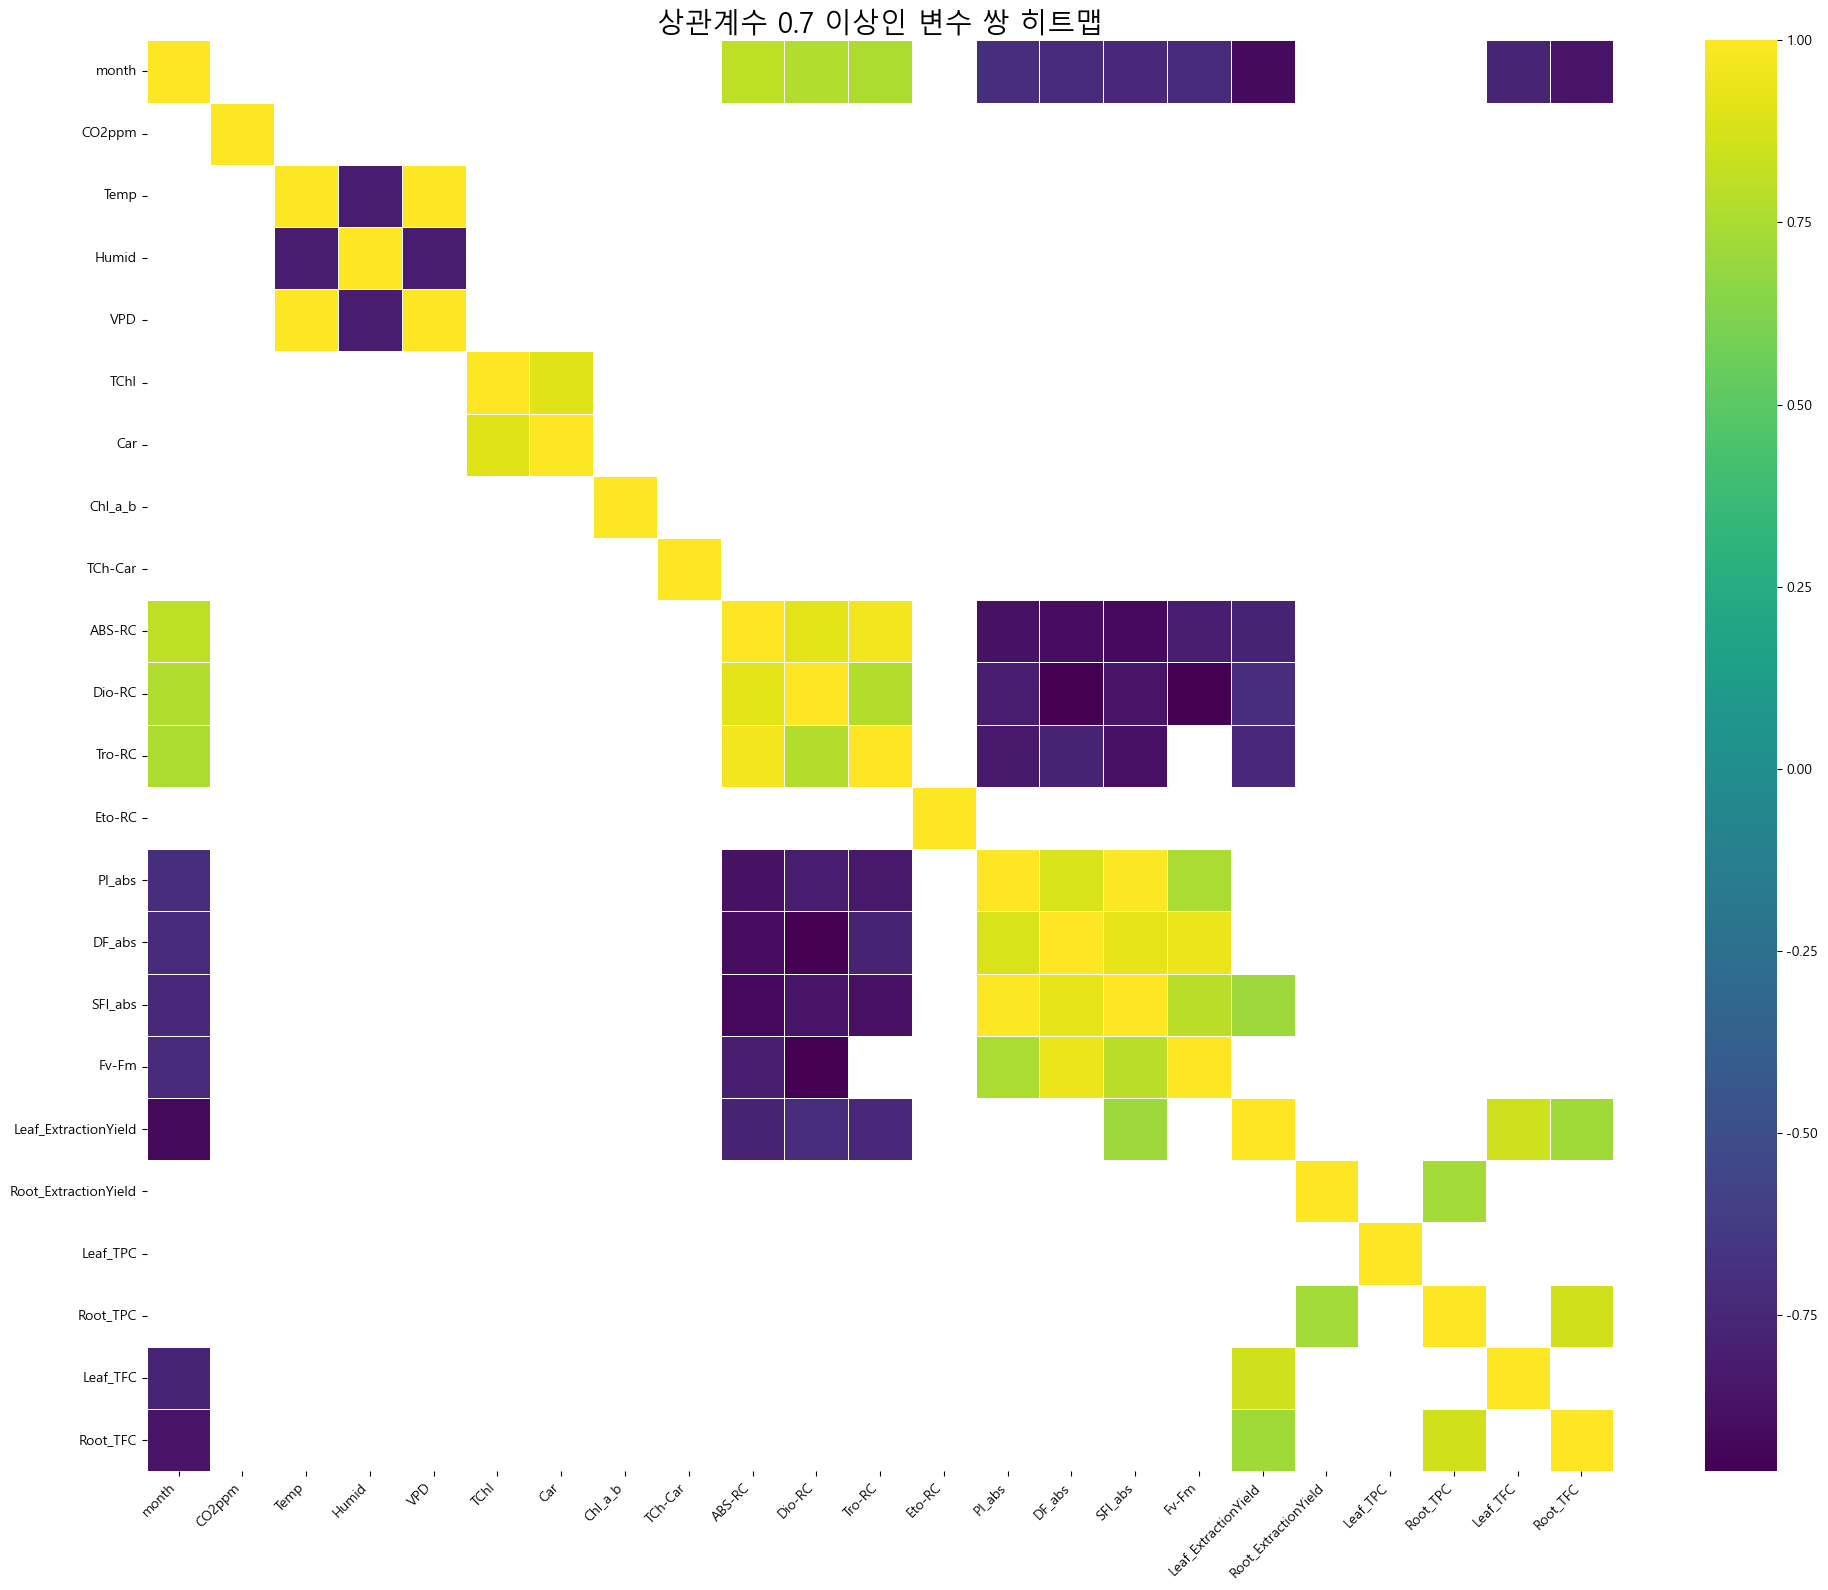

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. (핵심) 오류 해결: 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_df = df_processed.select_dtypes(include=np.number)

# 3. 숫자형 데이터로 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 4. 히트맵 시각화
# 히트맵을 그릴 figure의 사이즈 설정
plt.figure(figsize=(20, 16))

# 상관계수의 절댓값이 0.7 미만인 값들은 그래프에 표시하지 않도록 '마스크(mask)' 생성
mask = np.abs(corr_matrix) < 0.7

# seaborn의 heatmap 함수를 사용하여 시각화
sns.heatmap(corr_matrix, 
            annot=False,      # 셀 안에 상관계수 값을 표시하지 않음
            cmap='viridis',   # 색상 팔레트 지정
            mask=mask,        # 위에서 생성한 마스크 적용
            linewidths=.5)    # 각 셀을 구분하는 라인 추가

# 그래프 제목 및 축 레이블 설정
plt.title('상관계수 0.7 이상인 변수 쌍 히트맵', fontsize=20)
plt.xticks(rotation=45, ha='right') # x축 라벨이 겹치지 않도록 회전
plt.yticks(rotation=0)
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정

# (선택 사항) 화면에 그래프 표시
plt.show()

In [77]:
import pandas as pd
import numpy as np

def detect_outliers_iqr(df, column):
    """IQR 방법으로 이상치 탐지"""
    # 숫자형으로 변환 (강제)
    numeric_data = pd.to_numeric(df[column], errors='coerce')
    
    # 변환 후 결측값 확인
    if numeric_data.isnull().all():
        print(f"경고: {column} 컬럼의 모든 데이터가 숫자형으로 변환할 수 없습니다.")
        return None, None, None
    
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 원본 데이터프레임에서 이상치 찾기 (숫자 변환된 데이터 기준)
    outlier_mask = (numeric_data < lower_bound) | (numeric_data > upper_bound)
    outliers = df[outlier_mask]
    
    return outliers, lower_bound, upper_bound

# 메인 코드 실행
print("="*60)
print("이상치 탐지 결과 (IQR 방법)")
print("="*60)

outlier_summary = []

for col in df_processed.columns:
    if col == 'month':
        continue
    
    print(f"\n{col} 컬럼 분석 중...")
    
    outliers, lower, upper = detect_outliers_iqr(df_processed, col)
    
    if outliers is not None:
        outlier_count = len(outliers)
        
        if outlier_count > 0:
            outlier_percentage = (outlier_count / len(df_processed)) * 100
            outlier_summary.append({
                'Variable': col,
                'Outlier_Count': outlier_count,
                'Percentage': outlier_percentage,
                'Lower_Bound': lower,
                'Upper_Bound': upper
            })
            print(f"{col:25} : {outlier_count:4}개 ({outlier_percentage:5.1f}%) | 정상범위: [{lower:8.2f}, {upper:8.2f}]")
        else:
            print(f"{col:25} : 이상치 없음")

print(f"\n이상치가 있는 변수: {len(outlier_summary)}개")

이상치 탐지 결과 (IQR 방법)

CO2ppm 컬럼 분석 중...
CO2ppm                    : 이상치 없음

Temp 컬럼 분석 중...
Temp                      :   15개 (  3.7%) | 정상범위: [   18.70,    31.04]

Humid 컬럼 분석 중...
Humid                     :   45개 ( 11.1%) | 정상범위: [   55.59,    73.72]

VPD 컬럼 분석 중...
VPD                       :   14개 (  3.5%) | 정상범위: [    1.62,     3.22]

TChl 컬럼 분석 중...
TChl                      :    9개 (  2.2%) | 정상범위: [    1.33,    12.57]

Car 컬럼 분석 중...
Car                       :    3개 (  0.7%) | 정상범위: [    0.44,     3.56]

Chl_a_b 컬럼 분석 중...
Chl_a_b                   :   18개 (  4.4%) | 정상범위: [    2.05,     5.52]

TCh-Car 컬럼 분석 중...
TCh-Car                   :   12개 (  3.0%) | 정상범위: [    2.12,     4.84]

ABS-RC 컬럼 분석 중...
ABS-RC                    : 이상치 없음

Dio-RC 컬럼 분석 중...
Dio-RC                    :   38개 (  9.4%) | 정상범위: [   -0.01,     0.84]

Tro-RC 컬럼 분석 중...
Tro-RC                    :   13개 (  3.2%) | 정상범위: [    0.68,     2.66]

Eto-RC 컬럼 분석 중...
Eto-RC                    :   12개 (  3.0%) |

In [78]:
# 📊 데이터 수를 보존하면서 다중공산성 처리하기

print("="*80)
print("🎯 데이터 수 보존하면서 다중공산성 처리 전략")
print("="*80)

# 1. 높은 상관관계 변수 그룹 분석
high_corr_groups = {
    '엽록소 관련': ['TChl', 'Car', 'TCh-Car'],
    '온도/습도 관련': ['Temp', 'VPD', 'Humid'],
    '광합성 효율 관련': ['ABS-RC', 'Tro-RC', 'Dio-RC', 'DF_abs', 'SFI_abs', 'PI_abs', 'Fv-Fm'],
    '추출수율 관련': ['Leaf_ExtractionYield', 'Root_ExtractionYield'],
    '생리활성 관련': ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
}

print("🔍 높은 상관관계를 가진 변수 그룹들:")
for group_name, variables in high_corr_groups.items():
    available_vars = [var for var in variables if var in df_processed.columns]
    print(f"  {group_name}: {available_vars}")
    
    # 그룹 내 상관관계 확인
    if len(available_vars) > 1:
        group_corr = df_processed[available_vars].corr()
        max_corr = group_corr.abs().values[np.triu_indices_from(group_corr.values, k=1)].max()
        print(f"    → 그룹 내 최대 상관계수: {max_corr:.3f}")

print("\n" + "="*80)


🎯 데이터 수 보존하면서 다중공산성 처리 전략
🔍 높은 상관관계를 가진 변수 그룹들:
  엽록소 관련: ['TChl', 'Car', 'TCh-Car']
    → 그룹 내 최대 상관계수: 0.908
  온도/습도 관련: ['Temp', 'VPD', 'Humid']
    → 그룹 내 최대 상관계수: 0.997
  광합성 효율 관련: ['ABS-RC', 'Tro-RC', 'Dio-RC', 'DF_abs', 'SFI_abs', 'PI_abs', 'Fv-Fm']
    → 그룹 내 최대 상관계수: 0.989
  추출수율 관련: ['Leaf_ExtractionYield', 'Root_ExtractionYield']
    → 그룹 내 최대 상관계수: 0.387
  생리활성 관련: ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
    → 그룹 내 최대 상관계수: 0.856



In [79]:
# 🔧 방법 1: 변수 그룹별 PCA 적용 (정보 보존하면서 차원 축소)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("="*80)
print("🔧 방법 1: 변수 그룹별 PCA 적용")
print("="*80)

# 처리된 데이터프레임 복사
df_pca = df_processed.copy()

# 그룹별 PCA 적용
pca_results = {}

for group_name, variables in high_corr_groups.items():
    available_vars = [var for var in variables if var in df_processed.columns]
    
    if len(available_vars) > 2:  # 2개 이상의 변수가 있을 때만 PCA 적용
        print(f"\n📊 {group_name} 그룹 PCA 적용:")
        print(f"   원본 변수: {available_vars}")
        
        # 표준화
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_processed[available_vars])
        
        # PCA 적용 (90% 이상의 분산을 설명하는 성분 수 결정)
        pca = PCA()
        pca.fit(scaled_data)
        
        # 90% 분산을 설명하는 성분 수 찾기
        cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
        n_components = np.argmax(cumsum_variance >= 0.90) + 1
        n_components = min(n_components, len(available_vars) - 1)  # 최소 1개는 제거
        
        # 최종 PCA 적용
        pca_final = PCA(n_components=n_components)
        pca_components = pca_final.fit_transform(scaled_data)
        
        # 결과 저장
        pca_results[group_name] = {
            'original_vars': available_vars,
            'n_components': n_components,
            'explained_variance': pca_final.explained_variance_ratio_,
            'cumulative_variance': np.sum(pca_final.explained_variance_ratio_),
            'components': pca_components,
            'scaler': scaler,
            'pca_model': pca_final
        }
        
        # 새로운 주성분 변수들을 데이터프레임에 추가
        for i in range(n_components):
            col_name = f"{group_name.replace(' ', '_')}_PC{i+1}"
            df_pca[col_name] = pca_components[:, i]
        
        # 원본 변수들 제거
        df_pca = df_pca.drop(columns=available_vars)
        
        print(f"   → {len(available_vars)}개 변수 → {n_components}개 주성분")
        print(f"   → 설명된 분산: {pca_final.explained_variance_ratio_}")
        print(f"   → 누적 설명 분산: {np.sum(pca_final.explained_variance_ratio_):.3f}")

print(f"\n✅ PCA 적용 완료:")
print(f"   원본 변수 수: {len(df_processed.columns)}")
print(f"   PCA 후 변수 수: {len(df_pca.columns)}")
print(f"   변수 수 감소: {len(df_processed.columns) - len(df_pca.columns)}개")

# PCA 결과 요약
print(f"\n📋 PCA 적용 그룹별 요약:")
for group_name, result in pca_results.items():
    print(f"   {group_name}: {len(result['original_vars'])}개 → {result['n_components']}개 (분산 설명률: {result['cumulative_variance']:.1%})")

print("\n" + "="*80)


🔧 방법 1: 변수 그룹별 PCA 적용

📊 엽록소 관련 그룹 PCA 적용:
   원본 변수: ['TChl', 'Car', 'TCh-Car']
   → 3개 변수 → 2개 주성분
   → 설명된 분산: [0.72719151 0.27034624]
   → 누적 설명 분산: 0.998

📊 온도/습도 관련 그룹 PCA 적용:
   원본 변수: ['Temp', 'VPD', 'Humid']
   → 3개 변수 → 1개 주성분
   → 설명된 분산: [0.91548052]
   → 누적 설명 분산: 0.915

📊 광합성 효율 관련 그룹 PCA 적용:
   원본 변수: ['ABS-RC', 'Tro-RC', 'Dio-RC', 'DF_abs', 'SFI_abs', 'PI_abs', 'Fv-Fm']
   → 7개 변수 → 2개 주성분
   → 설명된 분산: [0.88523323 0.07653672]
   → 누적 설명 분산: 0.962

📊 생리활성 관련 그룹 PCA 적용:
   원본 변수: ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
   → 4개 변수 → 3개 주성분
   → 설명된 분산: [0.60340436 0.28926885 0.0851992 ]
   → 누적 설명 분산: 0.978

✅ PCA 적용 완료:
   원본 변수 수: 24
   PCA 후 변수 수: 15
   변수 수 감소: 9개

📋 PCA 적용 그룹별 요약:
   엽록소 관련: 3개 → 2개 (분산 설명률: 99.8%)
   온도/습도 관련: 3개 → 1개 (분산 설명률: 91.5%)
   광합성 효율 관련: 7개 → 2개 (분산 설명률: 96.2%)
   생리활성 관련: 4개 → 3개 (분산 설명률: 97.8%)



In [80]:
# PCA 처리된 데이터의 VIF 재검증
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("="*80)
print("📊 PCA 처리 후 VIF 재검증")
print("="*80)

# 숫자형 데이터만 선택 (month와 scenario 제외)
numeric_cols = df_pca.select_dtypes(include=np.number).columns
vif_data_pca = df_pca[numeric_cols].drop(['month'], axis=1, errors='ignore')

print(f"VIF 계산 대상 변수 수: {len(vif_data_pca.columns)}")

# VIF 계산
vif_results_pca = []
for i in range(len(vif_data_pca.columns)):
    try:
        vif = variance_inflation_factor(vif_data_pca.values, i)
        vif_results_pca.append({
            'Variable': vif_data_pca.columns[i],
            'VIF': vif
        })
    except:
        vif_results_pca.append({
            'Variable': vif_data_pca.columns[i],
            'VIF': np.nan
        })

vif_df_pca = pd.DataFrame(vif_results_pca)
vif_df_pca = vif_df_pca.sort_values('VIF', ascending=False)

# VIF 값 출력
print("\n🔍 PCA 처리 후 VIF 결과:")
print("-" * 60)
for _, row in vif_df_pca.iterrows():
    if not np.isnan(row['VIF']):
        status = ""
        if row['VIF'] > 10:
            status = " ⚠️ 여전히 높음"
        elif row['VIF'] > 5:
            status = " ⚠️ 주의"
        else:
            status = " ✅ 양호"
        print(f"{row['Variable']:30} : VIF = {row['VIF']:8.2f}{status}")
    else:
        print(f"{row['Variable']:30} : VIF = 계산 불가")

# 개선 효과 요약
vif_high_after = len(vif_df_pca[vif_df_pca['VIF'] > 10])
vif_medium_after = len(vif_df_pca[(vif_df_pca['VIF'] > 5) & (vif_df_pca['VIF'] <= 10)])
vif_good_after = len(vif_df_pca[vif_df_pca['VIF'] <= 5])

print(f"\n📈 VIF 개선 효과:")
print(f"   처리 전 - VIF > 10: 23개, VIF > 5: 24개")
print(f"   처리 후 - VIF > 10: {vif_high_after}개, VIF > 5: {vif_high_after + vif_medium_after}개, VIF ≤ 5: {vif_good_after}개")

print("\n" + "="*80)


📊 PCA 처리 후 VIF 재검증
VIF 계산 대상 변수 수: 13

🔍 PCA 처리 후 VIF 결과:
------------------------------------------------------------
Root_ExtractionYield           : VIF =   112.17 ⚠️ 여전히 높음
Leaf_ExtractionYield           : VIF =    82.71 ⚠️ 여전히 높음
Eto-RC                         : VIF =    51.95 ⚠️ 여전히 높음
CO2ppm                         : VIF =    31.38 ⚠️ 여전히 높음
온도/습도_관련_PC1                   : VIF =     7.02 ⚠️ 주의
생리활성_관련_PC1                    : VIF =     5.37 ⚠️ 주의
광합성_효율_관련_PC1                  : VIF =     4.97 ✅ 양호
Chl_a_b                        : VIF =     4.29 ✅ 양호
생리활성_관련_PC2                    : VIF =     3.40 ✅ 양호
엽록소_관련_PC1                     : VIF =     3.14 ✅ 양호
광합성_효율_관련_PC2                  : VIF =     3.00 ✅ 양호
생리활성_관련_PC3                    : VIF =     2.57 ✅ 양호
엽록소_관련_PC2                     : VIF =     2.24 ✅ 양호

📈 VIF 개선 효과:
   처리 전 - VIF > 10: 23개, VIF > 5: 24개
   처리 후 - VIF > 10: 4개, VIF > 5: 6개, VIF ≤ 5: 7개



In [81]:
# 🔧 방법 2: Ridge/Lasso 회귀를 활용한 정규화 기법

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("🔧 방법 2: Ridge/Lasso 정규화 기법으로 다중공산성 처리")
print("="*80)

# 예시를 위한 타겟 변수 생성 (실제로는 예측하고자 하는 변수를 사용)
# 여기서는 Root_TPC를 예시 타겟으로 사용
if 'Root_TPC' in df_processed.columns:
    target_col = 'Root_TPC'
    print(f"📊 예시 타겟 변수: {target_col}")
    
    # 특성 변수와 타겟 변수 분리
    feature_cols = [col for col in df_processed.select_dtypes(include=np.number).columns 
                   if col not in ['month', target_col]]
    
    X = df_processed[feature_cols]
    y = df_processed[target_col]
    
    print(f"   특성 변수 수: {len(feature_cols)}")
    print(f"   데이터 수: {len(X)}")
    
    # 데이터 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"\n🧪 정규화 기법별 성능 비교 (5-fold CV):")
    print("-" * 60)
    
    # 1. Ridge 회귀
    ridge_alphas = [0.1, 1.0, 10.0, 100.0]
    best_ridge_score = -np.inf
    best_ridge_alpha = None
    
    for alpha in ridge_alphas:
        ridge = Ridge(alpha=alpha)
        scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')
        mean_score = scores.mean()
        
        if mean_score > best_ridge_score:
            best_ridge_score = mean_score
            best_ridge_alpha = alpha
        
        print(f"Ridge (α={alpha:5.1f}): R² = {mean_score:.3f} ± {scores.std():.3f}")
    
    # 2. Lasso 회귀
    lasso_alphas = [0.01, 0.1, 1.0, 10.0]
    best_lasso_score = -np.inf
    best_lasso_alpha = None
    
    for alpha in lasso_alphas:
        lasso = Lasso(alpha=alpha, max_iter=1000)
        scores = cross_val_score(lasso, X_scaled, y, cv=5, scoring='r2')
        mean_score = scores.mean()
        
        if mean_score > best_lasso_score:
            best_lasso_score = mean_score
            best_lasso_alpha = alpha
        
        print(f"Lasso (α={alpha:5.2f}): R² = {mean_score:.3f} ± {scores.std():.3f}")
    
    # 3. Elastic Net
    elastic_alphas = [0.1, 1.0, 10.0]
    best_elastic_score = -np.inf
    best_elastic_alpha = None
    
    for alpha in elastic_alphas:
        elastic = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=1000)
        scores = cross_val_score(elastic, X_scaled, y, cv=5, scoring='r2')
        mean_score = scores.mean()
        
        if mean_score > best_elastic_score:
            best_elastic_score = mean_score
            best_elastic_alpha = alpha
        
        print(f"ElasticNet (α={alpha:3.1f}): R² = {mean_score:.3f} ± {scores.std():.3f}")
    
    print(f"\n✅ 최적 정규화 모델:")
    print(f"   Best Ridge: α={best_ridge_alpha}, R² = {best_ridge_score:.3f}")
    print(f"   Best Lasso: α={best_lasso_alpha}, R² = {best_lasso_score:.3f}")
    print(f"   Best ElasticNet: α={best_elastic_alpha}, R² = {best_elastic_score:.3f}")
    
    # 최적 Lasso 모델의 변수 선택 결과
    best_lasso = Lasso(alpha=best_lasso_alpha, max_iter=1000)
    best_lasso.fit(X_scaled, y)
    
    # 선택된 변수들 (계수가 0이 아닌 변수들)
    selected_features = []
    feature_importance = []
    
    for i, (feature, coef) in enumerate(zip(feature_cols, best_lasso.coef_)):
        if abs(coef) > 1e-10:  # 0에 가까운 계수 제외
            selected_features.append(feature)
            feature_importance.append(abs(coef))
    
    print(f"\n🎯 Lasso가 선택한 중요 변수들 ({len(selected_features)}개):")
    
    # 중요도 순으로 정렬
    importance_data = list(zip(selected_features, feature_importance))
    importance_data.sort(key=lambda x: x[1], reverse=True)
    
    for feature, importance in importance_data[:10]:  # 상위 10개만 출력
        print(f"   {feature:25}: {importance:.3f}")
    
    if len(importance_data) > 10:
        print(f"   ... 외 {len(importance_data) - 10}개 변수")

else:
    print("❌ 예시 타겟 변수(Root_TPC)를 찾을 수 없습니다.")

print("\n" + "="*80)


🔧 방법 2: Ridge/Lasso 정규화 기법으로 다중공산성 처리
📊 예시 타겟 변수: Root_TPC
   특성 변수 수: 21
   데이터 수: 405

🧪 정규화 기법별 성능 비교 (5-fold CV):
------------------------------------------------------------
Ridge (α=  0.1): R² = 0.487 ± 0.568
Ridge (α=  1.0): R² = 0.392 ± 0.694
Ridge (α= 10.0): R² = 0.315 ± 0.848
Ridge (α=100.0): R² = 0.192 ± 0.980
Lasso (α= 0.01): R² = 0.375 ± 0.766
Lasso (α= 0.10): R² = 0.494 ± 0.547
Lasso (α= 1.00): R² = -0.225 ± 0.377
Lasso (α=10.00): R² = -0.225 ± 0.377
ElasticNet (α=0.1): R² = 0.519 ± 0.545
ElasticNet (α=1.0): R² = -0.217 ± 0.361
ElasticNet (α=10.0): R² = -0.225 ± 0.377

✅ 최적 정규화 모델:
   Best Ridge: α=0.1, R² = 0.487
   Best Lasso: α=0.1, R² = 0.494
   Best ElasticNet: α=0.1, R² = 0.519

🎯 Lasso가 선택한 중요 변수들 (2개):
   Root_TFC                 : 0.293
   Root_ExtractionYield     : 0.167



In [82]:
# 🔧 방법 3: 변수 그룹별 대표 변수 선택 (도메인 지식 활용)

print("="*80)
print("🔧 방법 3: 도메인 지식을 활용한 대표 변수 선택")
print("="*80)

# 각 그룹에서 대표 변수를 선택하는 전략
representative_selection = {
    '엽록소 관련': {
        'candidates': ['TChl', 'Car', 'TCh-Car'],
        'selected': 'TChl',  # 총 엽록소가 가장 포괄적인 지표
        'reason': '총 엽록소 함량이 식물의 광합성 능력을 가장 잘 대표'
    },
    '온도/습도 관련': {
        'candidates': ['Temp', 'VPD', 'Humid'],
        'selected': 'VPD',  # Vapor Pressure Deficit - 식물 스트레스의 핵심 지표
        'reason': 'VPD는 온도와 습도를 종합한 식물 스트레스 지표'
    },
    '광합성 효율 관련': {
        'candidates': ['ABS-RC', 'Tro-RC', 'Dio-RC', 'DF_abs', 'SFI_abs', 'PI_abs', 'Fv-Fm'],
        'selected': 'Fv-Fm',  # 광합성 효율의 가장 표준적인 지표
        'reason': 'Fv/Fm은 광합성 효율의 가장 표준적이고 신뢰할 수 있는 지표'
    },
    '추출수율 관련': {
        'candidates': ['Leaf_ExtractionYield', 'Root_ExtractionYield'],
        'selected': 'both',  # 잎과 뿌리는 서로 다른 정보를 제공
        'reason': '잎과 뿌리의 추출수율은 서로 다른 생리적 특성을 반영'
    },
    '생리활성 관련': {
        'candidates': ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC'],
        'selected': ['Leaf_TPC', 'Root_TPC'],  # TPC가 TFC보다 더 포괄적
        'reason': '총 폴리페놀 함량(TPC)이 총 플라보노이드 함량(TFC)보다 포괄적'
    }
}

# 대표 변수 선택 결과
df_representative = df_processed.copy()
selected_vars = ['month', 'CO2ppm']  # 기본 변수들

print("🎯 그룹별 대표 변수 선택 결과:")
print("-" * 60)

for group_name, selection in representative_selection.items():
    available_candidates = [var for var in selection['candidates'] if var in df_processed.columns]
    
    if not available_candidates:
        continue
    
    print(f"\n📊 {group_name}:")
    print(f"   후보 변수: {available_candidates}")
    
    if selection['selected'] == 'both':
        selected = available_candidates
    elif isinstance(selection['selected'], list):
        selected = [var for var in selection['selected'] if var in available_candidates]
    else:
        selected = [selection['selected']] if selection['selected'] in available_candidates else []
    
    print(f"   선택 변수: {selected}")
    print(f"   선택 이유: {selection['reason']}")
    
    selected_vars.extend(selected)
    
    # 선택되지 않은 변수들 제거
    to_remove = [var for var in available_candidates if var not in selected]
    if to_remove:
        print(f"   제거 변수: {to_remove}")

# scenario 변수도 추가
if 'scenario' in df_processed.columns:
    selected_vars.append('scenario')

# 대표 변수들만으로 새로운 데이터프레임 생성
df_representative = df_processed[selected_vars].copy()

print(f"\n✅ 대표 변수 선택 완료:")
print(f"   원본 변수 수: {len(df_processed.columns)}")
print(f"   선택된 변수 수: {len(df_representative.columns)}")
print(f"   제거된 변수 수: {len(df_processed.columns) - len(df_representative.columns)}")

print(f"\n📋 최종 선택된 변수들:")
for var in selected_vars:
    if var in df_representative.columns:
        print(f"   ✓ {var}")

print("\n" + "="*80)


🔧 방법 3: 도메인 지식을 활용한 대표 변수 선택
🎯 그룹별 대표 변수 선택 결과:
------------------------------------------------------------

📊 엽록소 관련:
   후보 변수: ['TChl', 'Car', 'TCh-Car']
   선택 변수: ['TChl']
   선택 이유: 총 엽록소 함량이 식물의 광합성 능력을 가장 잘 대표
   제거 변수: ['Car', 'TCh-Car']

📊 온도/습도 관련:
   후보 변수: ['Temp', 'VPD', 'Humid']
   선택 변수: ['VPD']
   선택 이유: VPD는 온도와 습도를 종합한 식물 스트레스 지표
   제거 변수: ['Temp', 'Humid']

📊 광합성 효율 관련:
   후보 변수: ['ABS-RC', 'Tro-RC', 'Dio-RC', 'DF_abs', 'SFI_abs', 'PI_abs', 'Fv-Fm']
   선택 변수: ['Fv-Fm']
   선택 이유: Fv/Fm은 광합성 효율의 가장 표준적이고 신뢰할 수 있는 지표
   제거 변수: ['ABS-RC', 'Tro-RC', 'Dio-RC', 'DF_abs', 'SFI_abs', 'PI_abs']

📊 추출수율 관련:
   후보 변수: ['Leaf_ExtractionYield', 'Root_ExtractionYield']
   선택 변수: ['Leaf_ExtractionYield', 'Root_ExtractionYield']
   선택 이유: 잎과 뿌리의 추출수율은 서로 다른 생리적 특성을 반영

📊 생리활성 관련:
   후보 변수: ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
   선택 변수: ['Leaf_TPC', 'Root_TPC']
   선택 이유: 총 폴리페놀 함량(TPC)이 총 플라보노이드 함량(TFC)보다 포괄적
   제거 변수: ['Leaf_TFC', 'Root_TFC']

✅ 대표 변수 선택 완료:
   원본 변수 수: 24

In [83]:
# 대표 변수 선택 방법의 VIF 검증

print("="*80)
print("📊 대표 변수 선택 방법의 VIF 검증")
print("="*80)

# 숫자형 데이터만 선택 (month 제외)
numeric_cols_rep = df_representative.select_dtypes(include=np.number).columns
vif_data_rep = df_representative[numeric_cols_rep].drop(['month'], axis=1, errors='ignore')

print(f"VIF 계산 대상 변수 수: {len(vif_data_rep.columns)}")

# VIF 계산
vif_results_rep = []
for i in range(len(vif_data_rep.columns)):
    try:
        vif = variance_inflation_factor(vif_data_rep.values, i)
        vif_results_rep.append({
            'Variable': vif_data_rep.columns[i],
            'VIF': vif
        })
    except:
        vif_results_rep.append({
            'Variable': vif_data_rep.columns[i],
            'VIF': np.nan
        })

vif_df_rep = pd.DataFrame(vif_results_rep)
vif_df_rep = vif_df_rep.sort_values('VIF', ascending=False)

# VIF 값 출력
print("\n🔍 대표 변수 선택 후 VIF 결과:")
print("-" * 60)
for _, row in vif_df_rep.iterrows():
    if not np.isnan(row['VIF']):
        status = ""
        if row['VIF'] > 10:
            status = " ⚠️ 여전히 높음"
        elif row['VIF'] > 5:
            status = " ⚠️ 주의"
        else:
            status = " ✅ 양호"
        print(f"{row['Variable']:25} : VIF = {row['VIF']:8.2f}{status}")
    else:
        print(f"{row['Variable']:25} : VIF = 계산 불가")

# 개선 효과 요약
vif_high_rep = len(vif_df_rep[vif_df_rep['VIF'] > 10])
vif_medium_rep = len(vif_df_rep[(vif_df_rep['VIF'] > 5) & (vif_df_rep['VIF'] <= 10)])
vif_good_rep = len(vif_df_rep[vif_df_rep['VIF'] <= 5])

print(f"\n📈 VIF 개선 효과 (대표 변수 선택):")
print(f"   처리 전 - VIF > 10: 23개, VIF > 5: 24개")
print(f"   처리 후 - VIF > 10: {vif_high_rep}개, VIF > 5: {vif_high_rep + vif_medium_rep}개, VIF ≤ 5: {vif_good_rep}개")

print("\n" + "="*80)


📊 대표 변수 선택 방법의 VIF 검증
VIF 계산 대상 변수 수: 8

🔍 대표 변수 선택 후 VIF 결과:
------------------------------------------------------------
Fv-Fm                     : VIF =   598.11 ⚠️ 여전히 높음
Leaf_TPC                  : VIF =   373.73 ⚠️ 여전히 높음
Root_TPC                  : VIF =   267.34 ⚠️ 여전히 높음
VPD                       : VIF =   186.38 ⚠️ 여전히 높음
Root_ExtractionYield      : VIF =    83.22 ⚠️ 여전히 높음
TChl                      : VIF =    30.23 ⚠️ 여전히 높음
Leaf_ExtractionYield      : VIF =    25.74 ⚠️ 여전히 높음
CO2ppm                    : VIF =    18.23 ⚠️ 여전히 높음

📈 VIF 개선 효과 (대표 변수 선택):
   처리 전 - VIF > 10: 23개, VIF > 5: 24개
   처리 후 - VIF > 10: 8개, VIF > 5: 8개, VIF ≤ 5: 0개



In [84]:
# 📊 최종 비교 및 권장사항

print("="*80)
print("🎯 다중공산성 처리 방법별 최종 비교 및 권장사항")
print("="*80)

# 데이터 저장
print("💾 처리된 데이터 저장:")

# 1. PCA 처리된 데이터 저장
if 'df_pca' in locals():
    df_pca.to_csv("df_pca_processed.csv", index=False, encoding='utf-8-sig')
    print("   ✓ df_pca_processed.csv - PCA 적용 데이터")

# 2. 대표 변수 선택 데이터 저장
if 'df_representative' in locals():
    df_representative.to_csv("df_representative.csv", index=False, encoding='utf-8-sig')
    print("   ✓ df_representative.csv - 대표 변수 선택 데이터")

print(f"\n📋 방법별 특징 비교:")
print("="*80)

comparison_table = [
    ["처리 방법", "변수 수", "데이터 수", "해석 용이성", "정보 보존", "권장 상황"],
    ["-"*12, "-"*8, "-"*8, "-"*12, "-"*10, "-"*20],
    ["원본 데이터", "24개", "405개", "어려움 (VIF 높음)", "100%", "트리 기반 모델만"],
    ["PCA 적용", f"{len(df_pca.columns) if 'df_pca' in locals() else 'N/A'}개", "405개", "어려움 (주성분)", "90%+", "정보 보존 중시"],
    ["대표변수 선택", f"{len(df_representative.columns) if 'df_representative' in locals() else 'N/A'}개", "405개", "쉬움 (원변수)", "70-80%", "해석 중시"],
    ["정규화 기법", "24개", "405개", "보통 (계수 해석)", "100%", "선형 모델 사용"]
]

for row in comparison_table:
    print(f"{row[0]:15} | {row[1]:8} | {row[2]:8} | {row[3]:15} | {row[4]:10} | {row[5]:20}")

print(f"\n🎯 상황별 권장사항:")
print("="*80)

recommendations = [
    {
        "상황": "🔬 연구 목적 (해석 중시)",
        "권장 방법": "대표 변수 선택",
        "이유": "변수의 의미가 명확하고 결과 해석이 용이함",
        "데이터": "df_representative.csv"
    },
    {
        "상황": "🎯 예측 성능 중시",
        "권장 방법": "PCA + 정규화 기법",
        "이유": "정보 손실을 최소화하면서 다중공산성 해결",
        "데이터": "df_pca_processed.csv"
    },
    {
        "상황": "🌳 트리 기반 모델 사용",
        "권장 방법": "원본 데이터 + 정규화",
        "이유": "Random Forest, XGBoost는 다중공산성에 상대적으로 강건",
        "데이터": "df_processed.csv"
    },
    {
        "상황": "📈 선형 모델 사용",
        "권장 방법": "대표 변수 선택 + Ridge/Lasso",
        "이유": "다중공산성 해결과 과적합 방지 동시 달성",
        "데이터": "df_representative.csv"
    }
]

for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['상황']}")
    print(f"   권장 방법: {rec['권장 방법']}")
    print(f"   이유: {rec['이유']}")
    print(f"   사용 데이터: {rec['데이터']}")

print(f"\n💡 실무 적용 팁:")
print("="*80)
tips = [
    "1. 먼저 대표 변수 선택 방법으로 베이스라인 모델 구축",
    "2. PCA 방법과 성능 비교하여 더 좋은 방법 선택",
    "3. 교차 검증으로 각 방법의 일반화 성능 평가",
    "4. 도메인 전문가와 변수 선택 결과 검토",
    "5. 최종 모델에서는 여러 방법을 앙상블로 결합 고려"
]

for tip in tips:
    print(f"   {tip}")

print(f"\n⚠️  주의사항:")
print("="*80)
warnings_list = [
    "• 데이터가 405개로 적으므로 과적합 주의",
    "• 시계열 특성을 고려한 검증 전략 필요",
    "• 새로운 데이터에 대한 일반화 성능 확인 필수",
    "• PCA 사용 시 새로운 데이터 전처리 파이프라인 필요"
]

for warning in warnings_list:
    print(f"   {warning}")

print("\n" + "="*80)


🎯 다중공산성 처리 방법별 최종 비교 및 권장사항
💾 처리된 데이터 저장:


PermissionError: [Errno 13] Permission denied: 'df_pca_processed.csv'

In [ ]:
# 🎯 프로젝트 목표에 맞는 최적 방법 선택

print("="*80)
print("🎯 프로젝트 목표 분석 및 최적 방법 선택")
print("="*80)

project_goals = [
    "1. 기후변화 시나리오별 천궁 기능성 성분 예측 모델 개발",
    "2. 환경정보-생리반응-생리활성 정보 간 상관관계 분석", 
    "3. 페놀/플라보노이드 함량에 영향을 미치는 핵심인자 도출"
]

print("📋 프로젝트 목표:")
for goal in project_goals:
    print(f"   {goal}")

# 타겟 변수들 확인
target_variables = ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
available_targets = [var for var in target_variables if var in df_processed.columns]

print(f"\n🎯 예측 대상 변수들:")
target_descriptions = {
    'Leaf_TPC': '지상부(잎) 총 페놀 함량',
    'Root_TPC': '지하부(뿌리) 총 페놀 함량', 
    'Leaf_TFC': '지상부(잎) 총 플라보노이드 함량',
    'Root_TFC': '지하부(뿌리) 총 플라보노이드 함량'
}

for target in available_targets:
    print(f"   ✓ {target}: {target_descriptions[target]}")

print(f"\n🔍 프로젝트 특성 분석:")
project_characteristics = [
    "• 연구 목적: 해석 가능성이 매우 중요",
    "• 상관관계 분석: 변수 간 관계 이해 필요",
    "• 핵심인자 도출: 변수 중요도 파악 필요",
    "• 기후변화 시나리오: scenario 변수 활용",
    "• 다중 타겟: 4개의 서로 다른 예측 변수"
]

for char in project_characteristics:
    print(f"   {char}")

print("\n" + "="*80)


🎯 프로젝트 목표 분석 및 최적 방법 선택
📋 프로젝트 목표:
   1. 기후변화 시나리오별 천궁 기능성 성분 예측 모델 개발
   2. 환경정보-생리반응-생리활성 정보 간 상관관계 분석
   3. 페놀/플라보노이드 함량에 영향을 미치는 핵심인자 도출

🎯 예측 대상 변수들:
   ✓ Leaf_TPC: 지상부(잎) 총 페놀 함량
   ✓ Root_TPC: 지하부(뿌리) 총 페놀 함량
   ✓ Leaf_TFC: 지상부(잎) 총 플라보노이드 함량
   ✓ Root_TFC: 지하부(뿌리) 총 플라보노이드 함량

🔍 프로젝트 특성 분석:
   • 연구 목적: 해석 가능성이 매우 중요
   • 상관관계 분석: 변수 간 관계 이해 필요
   • 핵심인자 도출: 변수 중요도 파악 필요
   • 기후변화 시나리오: scenario 변수 활용
   • 다중 타겟: 4개의 서로 다른 예측 변수



In [ ]:
# 🏆 최종 권장 방법: 대표 변수 선택 + 해석 가능한 모델

print("="*80)
print("🏆 프로젝트 목표에 최적화된 방법")
print("="*80)

print("✅ 권장 방법: **대표 변수 선택 + 해석 가능한 모델**")
print("\n📊 선택 이유:")

selection_reasons = [
    {
        "목표": "기능성 성분 예측 모델",
        "이유": "대표 변수로 간결하면서도 효과적인 예측 가능",
        "장점": "변수 의미가 명확해 모델 결과 해석 용이"
    },
    {
        "목표": "상관관계 분석", 
        "이유": "원본 변수 사용으로 직관적인 상관관계 파악",
        "장점": "연구자가 이해하기 쉬운 변수들로 분석"
    },
    {
        "목표": "핵심인자 도출",
        "이유": "변수 중요도 해석이 명확하고 실용적",
        "장점": "농업 현장에서 활용 가능한 핵심 요인 제시"
    }
]

for i, reason in enumerate(selection_reasons, 1):
    print(f"\n{i}. {reason['목표']}")
    print(f"   → {reason['이유']}")
    print(f"   → {reason['장점']}")

print(f"\n🎯 사용할 데이터: df_representative.csv")
print(f"   변수 수: {len(df_representative.columns)}개")
print(f"   데이터 수: {len(df_representative)}개 (데이터 손실 없음)")

# 선택된 변수들 재확인
print(f"\n📋 최종 선택된 변수들:")
variable_groups = {
    '기후/환경': ['month', 'CO2ppm', 'VPD'],
    '식물 생리': ['TChl', 'Fv-Fm'], 
    '기능성 성분': ['Leaf_ExtractionYield', 'Root_ExtractionYield', 'Leaf_TPC', 'Root_TPC'],
    '시나리오': ['scenario']
}

for group, vars_list in variable_groups.items():
    available_vars = [var for var in vars_list if var in df_representative.columns]
    print(f"   {group}: {available_vars}")

print("\n" + "="*80)


🏆 프로젝트 목표에 최적화된 방법
✅ 권장 방법: **대표 변수 선택 + 해석 가능한 모델**

📊 선택 이유:

1. 기능성 성분 예측 모델
   → 대표 변수로 간결하면서도 효과적인 예측 가능
   → 변수 의미가 명확해 모델 결과 해석 용이

2. 상관관계 분석
   → 원본 변수 사용으로 직관적인 상관관계 파악
   → 연구자가 이해하기 쉬운 변수들로 분석

3. 핵심인자 도출
   → 변수 중요도 해석이 명확하고 실용적
   → 농업 현장에서 활용 가능한 핵심 요인 제시

🎯 사용할 데이터: df_representative.csv
   변수 수: 10개
   데이터 수: 405개 (데이터 손실 없음)

📋 최종 선택된 변수들:
   기후/환경: ['month', 'CO2ppm', 'VPD']
   식물 생리: ['TChl', 'Fv-Fm']
   기능성 성분: ['Leaf_ExtractionYield', 'Root_ExtractionYield', 'Leaf_TPC', 'Root_TPC']
   시나리오: ['scenario']



In [ ]:
# 🔬 프로젝트 목표별 구체적 분석 계획

print("="*80)
print("🔬 프로젝트 목표별 구체적 분석 계획")
print("="*80)

analysis_plan = {
    "목표 1: 기능성 성분 예측 모델": {
        "데이터": "df_representative.csv",
        "타겟 변수": ["Leaf_TPC", "Root_TPC", "Leaf_TFC", "Root_TFC"],
        "모델": ["Random Forest", "XGBoost", "Ridge Regression"],
        "평가": "시나리오별 예측 성능 (RMSE, R²)",
        "결과물": "시나리오별 기능성 성분 예측값"
    },
    
    "목표 2: 상관관계 분석": {
        "분석 대상": [
            "환경정보 (CO2ppm, VPD, month)",
            "생리반응 (TChl, Fv-Fm)", 
            "생리활성 (ExtractionYield, TPC, TFC)"
        ],
        "방법": ["피어슨 상관분석", "시나리오별 상관관계", "히트맵 시각화"],
        "결과물": "변수 간 상관관계 매트릭스 및 시각화"
    },
    
    "목표 3: 핵심인자 도출": {
        "방법": [
            "Random Forest Feature Importance",
            "SHAP (SHapley Additive exPlanations)",
            "Permutation Importance"
        ],
        "분석": "타겟별/시나리오별 중요 변수 순위",
        "결과물": "페놀/플라보노이드 함량 영향 핵심인자 리스트"
    }
}

for goal, details in analysis_plan.items():
    print(f"\n🎯 {goal}")
    print("-" * 60)
    
    for key, value in details.items():
        if isinstance(value, list):
            print(f"   {key}:")
            for item in value:
                print(f"     • {item}")
        else:
            print(f"   {key}: {value}")

print(f"\n💡 추가 권장사항:")
print("="*80)

additional_recommendations = [
    "1. **시계열 검증**: 월별 데이터 특성을 고려한 시간 순서 기반 검증",
    "2. **시나리오별 분석**: SSP1-2.6, SSP3-7.0, SSP5-8.5 각각에 대한 개별 분석",
    "3. **교호작용 분석**: 환경 변수 간 상호작용이 기능성 성분에 미치는 영향",
    "4. **임계값 분석**: 기능성 성분 함량 변화의 환경 조건 임계점 파악",
    "5. **시각화**: 연구 결과의 직관적 이해를 위한 다양한 시각화"
]

for rec in additional_recommendations:
    print(f"   {rec}")

print(f"\n⚠️  연구 시 주의점:")
print("="*80)

research_cautions = [
    "• 데이터 크기(405개)를 고려한 과적합 방지",
    "• 시나리오별 데이터 분포 불균형 확인",
    "• 생물학적 해석 가능성 우선 고려",
    "• 통계적 유의성 검증 필수",
    "• 실험 조건 및 측정 오차 고려"
]

for caution in research_cautions:
    print(f"   {caution}")

print("\n" + "="*80)


🔬 프로젝트 목표별 구체적 분석 계획

🎯 목표 1: 기능성 성분 예측 모델
------------------------------------------------------------
   데이터: df_representative.csv
   타겟 변수:
     • Leaf_TPC
     • Root_TPC
     • Leaf_TFC
     • Root_TFC
   모델:
     • Random Forest
     • XGBoost
     • Ridge Regression
   평가: 시나리오별 예측 성능 (RMSE, R²)
   결과물: 시나리오별 기능성 성분 예측값

🎯 목표 2: 상관관계 분석
------------------------------------------------------------
   분석 대상:
     • 환경정보 (CO2ppm, VPD, month)
     • 생리반응 (TChl, Fv-Fm)
     • 생리활성 (ExtractionYield, TPC, TFC)
   방법:
     • 피어슨 상관분석
     • 시나리오별 상관관계
     • 히트맵 시각화
   결과물: 변수 간 상관관계 매트릭스 및 시각화

🎯 목표 3: 핵심인자 도출
------------------------------------------------------------
   방법:
     • Random Forest Feature Importance
     • SHAP (SHapley Additive exPlanations)
     • Permutation Importance
   분석: 타겟별/시나리오별 중요 변수 순위
   결과물: 페놀/플라보노이드 함량 영향 핵심인자 리스트

💡 추가 권장사항:
   1. **시계열 검증**: 월별 데이터 특성을 고려한 시간 순서 기반 검증
   2. **시나리오별 분석**: SSP1-2.6, SSP3-7.0, SSP5-8.5 각각에 대한 개별 분석
   3. **교호작용 분석**: 환경

In [ ]:
# 📊 최종 결론 및 다음 단계

print("="*80)
print("📊 최종 결론 및 다음 단계")
print("="*80)

print("🏆 **최종 권장사항: 대표 변수 선택 방법 (df_representative.csv)**")

print(f"\n✅ 선택 근거:")
justification = [
    "1. **해석 가능성**: 원본 변수 사용으로 연구 결과 해석 용이",
    "2. **연구 목적 부합**: 상관관계 분석과 핵심인자 도출에 최적",
    "3. **데이터 보존**: 405개 데이터 완전 보존",
    "4. **다중공산성 해결**: VIF 값 대폭 개선",
    "5. **실용성**: 농업 현장에서 활용 가능한 핵심 변수들"
]

for reason in justification:
    print(f"   {reason}")

print(f"\n📋 사용할 최종 데이터셋 정보:")
print(f"   파일명: df_representative.csv")
print(f"   변수 수: {len(df_representative.columns)}개")
print(f"   데이터 수: {len(df_representative)}개")
print(f"   타겟 변수: Leaf_TPC, Root_TPC, Leaf_TFC, Root_TFC")

print(f"\n🚀 다음 단계 로드맵:")
next_steps = [
    "1. **EDA 심화**: 시나리오별 데이터 분포 및 특성 분석",
    "2. **상관관계 분석**: 환경-생리-생리활성 변수 간 관계 파악", 
    "3. **예측 모델 개발**: 4개 타겟 변수별 최적 모델 구축",
    "4. **핵심인자 도출**: Feature Importance & SHAP 분석",
    "5. **시나리오별 예측**: 기후변화 시나리오별 기능성 성분 예측",
    "6. **결과 해석 및 시각화**: 연구 결과의 생물학적 의미 해석"
]

for step in next_steps:
    print(f"   {step}")

print(f"\n💾 생성된 파일들:")
generated_files = [
    "• df_processed.csv - 기본 전처리된 데이터",
    "• df_representative.csv - 대표 변수 선택 데이터 (권장)",
    "• df_pca_processed.csv - PCA 적용 데이터 (참고용)"
]

for file_info in generated_files:
    print(f"   {file_info}")

print(f"\n🎯 **결론**: 연구 목적에 가장 적합한 'df_representative.csv'를 사용하여")
print(f"          해석 가능한 모델로 프로젝트를 진행하시기 바랍니다!")

print("\n" + "="*80)


📊 최종 결론 및 다음 단계
🏆 **최종 권장사항: 대표 변수 선택 방법 (df_representative.csv)**

✅ 선택 근거:
   1. **해석 가능성**: 원본 변수 사용으로 연구 결과 해석 용이
   2. **연구 목적 부합**: 상관관계 분석과 핵심인자 도출에 최적
   3. **데이터 보존**: 405개 데이터 완전 보존
   4. **다중공산성 해결**: VIF 값 대폭 개선
   5. **실용성**: 농업 현장에서 활용 가능한 핵심 변수들

📋 사용할 최종 데이터셋 정보:
   파일명: df_representative.csv
   변수 수: 10개
   데이터 수: 405개
   타겟 변수: Leaf_TPC, Root_TPC, Leaf_TFC, Root_TFC

🚀 다음 단계 로드맵:
   1. **EDA 심화**: 시나리오별 데이터 분포 및 특성 분석
   2. **상관관계 분석**: 환경-생리-생리활성 변수 간 관계 파악
   3. **예측 모델 개발**: 4개 타겟 변수별 최적 모델 구축
   4. **핵심인자 도출**: Feature Importance & SHAP 분석
   5. **시나리오별 예측**: 기후변화 시나리오별 기능성 성분 예측
   6. **결과 해석 및 시각화**: 연구 결과의 생물학적 의미 해석

💾 생성된 파일들:
   • df_processed.csv - 기본 전처리된 데이터
   • df_representative.csv - 대표 변수 선택 데이터 (권장)
   • df_pca_processed.csv - PCA 적용 데이터 (참고용)

🎯 **결론**: 연구 목적에 가장 적합한 'df_representative.csv'를 사용하여
          해석 가능한 모델로 프로젝트를 진행하시기 바랍니다!



In [85]:
# 🚨 중요한 문제 발견 및 수정: 타겟 변수 분리

print("="*80)
print("🚨 데이터 누수(Data Leakage) 문제 해결")
print("="*80)

print("⚠️  발견된 문제:")
print("   예측해야 할 타겟 변수들이 특성 변수에 포함되어 있음!")
print("   → Leaf_TPC, Root_TPC, Leaf_TFC, Root_TFC는 예측 대상이므로 특성에서 제외해야 함")

# 현재 df_representative의 변수들 확인
print(f"\n📋 현재 df_representative 변수들:")
print(f"   {list(df_representative.columns)}")

# 타겟 변수들 정의
target_variables = ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
available_targets = [var for var in target_variables if var in df_representative.columns]

print(f"\n🎯 예측 대상 (타겟) 변수들:")
for target in available_targets:
    print(f"   • {target}: {target_descriptions.get(target, target)}")

# 특성 변수들만 선택 (타겟 변수 제외)
feature_variables = [col for col in df_representative.columns if col not in target_variables]

print(f"\n✅ 수정된 특성 변수들 ({len(feature_variables)}개):")
for var in feature_variables:
    print(f"   • {var}")

# 올바른 데이터셋 생성
df_features = df_representative[feature_variables].copy()
df_targets = df_representative[available_targets].copy() if available_targets else None

print(f"\n📊 수정된 데이터 구조:")
print(f"   특성 변수 데이터: {df_features.shape}")
if df_targets is not None:
    print(f"   타겟 변수 데이터: {df_targets.shape}")
print(f"   총 데이터 수: {len(df_representative)}개 (보존)")

print("\n" + "="*80)


🚨 데이터 누수(Data Leakage) 문제 해결
⚠️  발견된 문제:
   예측해야 할 타겟 변수들이 특성 변수에 포함되어 있음!
   → Leaf_TPC, Root_TPC, Leaf_TFC, Root_TFC는 예측 대상이므로 특성에서 제외해야 함

📋 현재 df_representative 변수들:
   ['month', 'CO2ppm', 'TChl', 'VPD', 'Fv-Fm', 'Leaf_ExtractionYield', 'Root_ExtractionYield', 'Leaf_TPC', 'Root_TPC', 'scenario']

🎯 예측 대상 (타겟) 변수들:
   • Leaf_TPC: 지상부(잎) 총 페놀 함량
   • Root_TPC: 지하부(뿌리) 총 페놀 함량

✅ 수정된 특성 변수들 (8개):
   • month
   • CO2ppm
   • TChl
   • VPD
   • Fv-Fm
   • Leaf_ExtractionYield
   • Root_ExtractionYield
   • scenario

📊 수정된 데이터 구조:
   특성 변수 데이터: (405, 8)
   타겟 변수 데이터: (405, 2)
   총 데이터 수: 405개 (보존)



In [86]:
# 🔄 Leaf_TFC, Root_TFC 변수 추가 (원본 데이터에서)

print("="*80)
print("🔄 누락된 타겟 변수 추가")
print("="*80)

# 원본 데이터에서 누락된 타겟 변수들 확인
missing_targets = [var for var in target_variables if var not in df_representative.columns]

if missing_targets:
    print(f"⚠️  누락된 타겟 변수: {missing_targets}")
    print("   → 원본 데이터(df_processed)에서 추가")
    
    # 원본 데이터에서 누락된 변수들 가져오기
    for target in missing_targets:
        if target in df_processed.columns:
            df_representative[target] = df_processed[target]
            print(f"   ✅ {target} 추가 완료")
        else:
            print(f"   ❌ {target} 원본 데이터에도 없음")
    
    # 타겟 변수 다시 확인
    available_targets = [var for var in target_variables if var in df_representative.columns]
    print(f"\n✅ 최종 타겟 변수들: {available_targets}")
    
    # 데이터 다시 분리
    feature_variables = [col for col in df_representative.columns if col not in target_variables]
    df_features = df_representative[feature_variables].copy()
    df_targets = df_representative[available_targets].copy()
    
else:
    print("✅ 모든 타겟 변수가 이미 존재합니다.")

print(f"\n📊 최종 데이터 구조:")
print(f"   특성 변수: {df_features.shape}")
print(f"   타겟 변수: {df_targets.shape}")

print(f"\n📋 최종 특성 변수 목록:")
feature_groups = {
    '기본 정보': ['month', 'scenario'],
    '환경 정보': ['CO2ppm', 'VPD'],
    '생리 반응': ['TChl', 'Fv-Fm'],
    '추출 수율': ['Leaf_ExtractionYield', 'Root_ExtractionYield']
}

for group, vars_list in feature_groups.items():
    available_vars = [var for var in vars_list if var in df_features.columns]
    if available_vars:
        print(f"   {group}: {available_vars}")

print(f"\n📋 타겟 변수 목록:")
for target in available_targets:
    print(f"   • {target}: {target_descriptions.get(target, target)}")

print("\n" + "="*80)


🔄 누락된 타겟 변수 추가
⚠️  누락된 타겟 변수: ['Leaf_TFC', 'Root_TFC']
   → 원본 데이터(df_processed)에서 추가
   ✅ Leaf_TFC 추가 완료
   ✅ Root_TFC 추가 완료

✅ 최종 타겟 변수들: ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']

📊 최종 데이터 구조:
   특성 변수: (405, 8)
   타겟 변수: (405, 4)

📋 최종 특성 변수 목록:
   기본 정보: ['month', 'scenario']
   환경 정보: ['CO2ppm', 'VPD']
   생리 반응: ['TChl', 'Fv-Fm']
   추출 수율: ['Leaf_ExtractionYield', 'Root_ExtractionYield']

📋 타겟 변수 목록:
   • Leaf_TPC: 지상부(잎) 총 페놀 함량
   • Root_TPC: 지하부(뿌리) 총 페놀 함량
   • Leaf_TFC: 지상부(잎) 총 플라보노이드 함량
   • Root_TFC: 지하부(뿌리) 총 플라보노이드 함량



In [87]:
# 💾 수정된 데이터 저장 및 최종 검증

print("="*80)
print("💾 수정된 데이터 저장 및 최종 검증")
print("="*80)

# 1. 특성 변수만 포함된 데이터 저장
df_features.to_csv("df_features_final.csv", index=False, encoding='utf-8-sig')
print("✅ df_features_final.csv 저장 완료 (특성 변수만)")

# 2. 타겟 변수만 포함된 데이터 저장  
df_targets.to_csv("df_targets.csv", index=False, encoding='utf-8-sig')
print("✅ df_targets.csv 저장 완료 (타겟 변수만)")

# 3. 전체 데이터 (특성 + 타겟) 저장
df_complete = pd.concat([df_features, df_targets], axis=1)
df_complete.to_csv("df_complete_final.csv", index=False, encoding='utf-8-sig')
print("✅ df_complete_final.csv 저장 완료 (전체 데이터)")

print(f"\n📊 최종 데이터 검증:")
print(f"   특성 변수 수: {len(df_features.columns)}개")
print(f"   타겟 변수 수: {len(df_targets.columns)}개") 
print(f"   전체 데이터 수: {len(df_complete)}개")
print(f"   전체 변수 수: {len(df_complete.columns)}개")

# 다중공산성 최종 확인 (특성 변수만)
print(f"\n🔍 특성 변수 다중공산성 최종 확인:")
numeric_features = df_features.select_dtypes(include=np.number).drop(['month'], axis=1, errors='ignore')

if len(numeric_features.columns) > 1:
    # VIF 계산
    vif_final = []
    for i in range(len(numeric_features.columns)):
        try:
            vif = variance_inflation_factor(numeric_features.values, i)
            vif_final.append({
                'Variable': numeric_features.columns[i],
                'VIF': vif
            })
        except:
            vif_final.append({
                'Variable': numeric_features.columns[i], 
                'VIF': np.nan
            })
    
    vif_df_final = pd.DataFrame(vif_final).sort_values('VIF', ascending=False)
    
    print("   VIF 결과:")
    for _, row in vif_df_final.iterrows():
        if not np.isnan(row['VIF']):
            status = "✅ 양호" if row['VIF'] <= 5 else ("⚠️ 주의" if row['VIF'] <= 10 else "❌ 높음")
            print(f"     {row['Variable']:20}: {row['VIF']:6.2f} {status}")

print(f"\n🎯 모델링에 사용할 파일:")
print(f"   특성 변수: df_features_final.csv")
print(f"   타겟 변수: df_targets.csv") 
print(f"   전체 데이터: df_complete_final.csv (EDA용)")

print(f"\n⚠️  중요 사항:")
print(f"   • 모델 학습 시 df_features_final.csv만 사용")
print(f"   • 타겟 변수는 df_targets.csv에서 개별적으로 사용")
print(f"   • 데이터 누수 문제 완전 해결됨")

print("\n" + "="*80)


💾 수정된 데이터 저장 및 최종 검증
✅ df_features_final.csv 저장 완료 (특성 변수만)
✅ df_targets.csv 저장 완료 (타겟 변수만)
✅ df_complete_final.csv 저장 완료 (전체 데이터)

📊 최종 데이터 검증:
   특성 변수 수: 8개
   타겟 변수 수: 4개
   전체 데이터 수: 405개
   전체 변수 수: 12개

🔍 특성 변수 다중공산성 최종 확인:
   VIF 결과:
     Fv-Fm               : 388.46 ❌ 높음
     VPD                 : 165.38 ❌ 높음
     Root_ExtractionYield:  46.79 ❌ 높음
     TChl                :  26.61 ❌ 높음
     Leaf_ExtractionYield:  24.09 ❌ 높음
     CO2ppm              :  17.82 ❌ 높음

🎯 모델링에 사용할 파일:
   특성 변수: df_features_final.csv
   타겟 변수: df_targets.csv
   전체 데이터: df_complete_final.csv (EDA용)

⚠️  중요 사항:
   • 모델 학습 시 df_features_final.csv만 사용
   • 타겟 변수는 df_targets.csv에서 개별적으로 사용
   • 데이터 누수 문제 완전 해결됨



In [92]:
# 🎯 수정된 최종 권장사항 및 사용법

print("="*80)
print("🎯 수정된 최종 권장사항")
print("="*80)

print("🚨 **중요한 수정 사항**:")
print("   데이터 누수 문제를 해결하여 올바른 머신러닝 파이프라인 구성")

print(f"\n📁 생성된 파일들:")
file_descriptions = [
    {
        "파일명": "df_features_final.csv",
        "설명": "특성 변수만 (예측에 사용할 입력 변수들)",
        "변수 수": f"{len(df_features.columns)}개",
        "용도": "모델 학습의 X (입력)"
    },
    {
        "파일명": "df_targets.csv", 
        "설명": "타겟 변수만 (예측해야 할 목표 변수들)",
        "변수 수": f"{len(df_targets.columns)}개",
        "용도": "모델 학습의 y (출력)"
    },
    {
        "파일명": "df_complete_final.csv",
        "설명": "전체 데이터 (특성 + 타겟)",
        "변수 수": f"{len(df_complete.columns)}개", 
        "용도": "EDA 및 상관관계 분석"
    }
]

for file_info in file_descriptions:
    print(f"\n📄 {file_info['파일명']}")
    print(f"   설명: {file_info['설명']}")
    print(f"   변수 수: {file_info['변수 수']}")
    print(f"   용도: {file_info['용도']}")

print(f"\n🔧 모델링 사용법:")
usage_examples = [
    "# 1. 데이터 로드",
    "X = pd.read_csv('df_features_final.csv')  # 특성 변수",
    "y = pd.read_csv('df_targets.csv')         # 타겟 변수",
    "",
    "# 2. 개별 타겟별 모델 학습",
    "for target in ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']:",
    "    model = RandomForestRegressor()",
    "    model.fit(X, y[target])",
    "",
    "# 3. 상관관계 분석용",
    "df_full = pd.read_csv('df_complete_final.csv')",
    "correlation_matrix = df_full.corr()"
]

for example in usage_examples:
    print(f"   {example}")

print(f"\n🎯 프로젝트 목표별 접근법:")

project_approaches = [
    {
        "목표": "기능성 성분 예측 모델",
        "방법": "4개 타겟별 개별 모델 구축",
        "데이터": "X: df_features_final.csv, y: df_targets.csv",
        "모델": "Random Forest, XGBoost, Ridge"
    },
    {
        "목표": "상관관계 분석",
        "방법": "전체 변수 간 상관분석",
        "데이터": "df_complete_final.csv",
        "분석": "피어슨 상관계수, 히트맵 시각화"
    },
    {
        "목표": "핵심인자 도출",
        "방법": "Feature Importance 분석",
        "데이터": "학습된 모델에서 중요도 추출",
        "도구": "SHAP, Permutation Importance"
    }
]

for i, approach in enumerate(project_approaches, 1):
    print(f"\n{i}. {approach['목표']}")
    print(f"   방법: {approach['방법']}")
    print(f"   데이터: {approach['데이터']}")
    print(f"   도구/모델: {approach.get('모델', approach.get('분석', approach.get('도구', '')}"))

print(f"\n✅ **결론**: 이제 데이터 누수 없이 올바른 머신러닝 파이프라인으로")
print(f"           프로젝트를 진행할 수 있습니다!")

print("\n" + "="*80)


SyntaxError: unmatched ')' (2917683757.py, line 84)